# Análisis de datos

> *Versión preliminar*

Integrantes:
  - Francisco Arenas
  - Sofía Rebolledo
  - Alvaro Romero

In [1]:
# FLAGS
FLAG_DATASET_DL = True

## Instalación de librerías e importación de datos

In [2]:
# Actualizar pip
%pip install --upgrade pip
# Instalar dependencias
%pip install numpy pandas matplotlib
# Dependencias para leer archivos Parquet
%pip install pyarrow fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.4 MB/s eta 0:00:00


In [36]:
# Importar librerías
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Crear directorios
PATH_DATASETS = "datasets"
PATH_DATASETS_FOODCOM = os.path.join(PATH_DATASETS, "foodcom")
PATH_DATASETS_MEALRECPLUS = os.path.join(PATH_DATASETS, "mealrecplus")
PATH_DATASETS_NUTRIGREEN = os.path.join(PATH_DATASETS, "nutrigreen")
os.makedirs(PATH_DATASETS, exist_ok=True)

In [4]:
if FLAG_DATASET_DL:
  # Descargar "Recipes and Reviews" de Food.com
  os.system(f"curl -L -o {PATH_DATASETS_FOODCOM}.zip https://www.kaggle.com/api/v1/datasets/download/irkaal/foodcom-recipes-and-reviews")
  os.system(f"unzip -o {PATH_DATASETS_FOODCOM}.zip -d {PATH_DATASETS_FOODCOM}")
  # Eliminar el zip
  os.remove(f"{PATH_DATASETS_FOODCOM}.zip")

  # Cita: Dominio público (https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews)

In [5]:
if FLAG_DATASET_DL:
  # Descargar "MealRecPlus" de WUT-IDEA
  os.system(f"curl -L -o {PATH_DATASETS_MEALRECPLUS}.zip https://github.com/WUT-IDEA/MealRecPlus/archive/refs/heads/main.zip")
  os.system(f"unzip -o {PATH_DATASETS_MEALRECPLUS}.zip -d {PATH_DATASETS_MEALRECPLUS}")
  # Eliminar el zip
  os.remove(f"{PATH_DATASETS_MEALRECPLUS}.zip")
  # Cita: Ming Li, Lin Li, Xiaohui Tao, and Jimmy Xiangji Huang. 2024. MealRec+: A Meal Recommendation Dataset with Meal-Course Affiliation for Personal- ization and Healthiness. In Proceedings of the 47th International ACM SIGIR Conference on Research and Development in Information Retrieval (SIGIR ’24), July 14–18, 2024, Washington, DC, USA. ACM, New York, NY, USA, 11 pages. https://doi.org/10.1145/3626772.3657857 (https://github.com/WUT-IDEA/MealRecPlus)

In [6]:
if FLAG_DATASET_DL:
  # Descargar "NutriGreen Image Dataset" de NutriGreen
  os.system(f"curl -L -o {PATH_DATASETS_NUTRIGREEN}.zip https://zenodo.org/api/records/10020545/files-archive")
  os.system(f"unzip -o {PATH_DATASETS_NUTRIGREEN}.zip -d {PATH_DATASETS_NUTRIGREEN}")
  # Eliminar el zip
  os.remove(f"{PATH_DATASETS_NUTRIGREEN}.zip")
  # Cita: https://data.niaid.nih.gov/resources?id=zenodo_8374046

## Utilidades

## Análisis: foodcom

### Contexto

El conjunto de datos de recetas contiene 522,517 recetas de 312 categorías diferentes. Este conjunto proporciona información sobre cada receta, como tiempos de cocción, porciones, ingredientes, nutrición, instrucciones y más. El conjunto de datos de reseñas contiene 1,401,982 reseñas de 271,907 usuarios diferentes. Este conjunto proporciona información sobre el autor, la calificación, el texto de la reseña y más.

### Contenido
El conjunto de datos de recetas se proporciona en dos formatos diferentes:

- Se recomienda utilizar `recipes.parquet` y `reviews.parquet` ya que preservan el esquema de los datos originales.
- `recipes.csv` está diseñado para ser analizado en R, mientras que `reviews.csv` no contiene columnas de listas, por lo que puede analizarse fácilmente.


In [ ]:
# Cargamos primero las recetas
df_foodcom_recipes = pd.read_parquet(os.path.join(PATH_DATASETS_FOODCOM, "recipes.parquet"))
df_foodcom_recipes.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,None,"[Toss 2 cups berries with sugar., Let stand fo..."
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00+00:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,None,[Soak saffron in warm milk for 5 minutes and p...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00+00:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,None,"[Into a 1 quart Jar with tight fitting lid, pu..."
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00+00:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"[Drain the tofu, carefully squeezing out exces..."
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,None,"[Mix everything together and bring to a boil.,..."


In [ ]:
# Cargamos ahora los reviews
df_foodcom_reviews = pd.read_parquet(os.path.join(PATH_DATASETS_FOODCOM, "reviews.parquet"))
df_foodcom_reviews.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17 16:49:59+00:00,2001-10-17 16:49:59+00:00
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25 09:00:00+00:00,2000-02-25 09:00:00+00:00
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00,2000-03-13 21:15:00+00:00
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28 12:51:00+00:00,2000-03-28 12:51:00+00:00


In [ ]:
df_foodcom_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   ReviewId       1401982 non-null  int32              
 1   RecipeId       1401982 non-null  int32              
 2   AuthorId       1401982 non-null  int32              
 3   AuthorName     1401982 non-null  object             
 4   Rating         1401982 non-null  int32              
 5   Review         1401982 non-null  object             
 6   DateSubmitted  1401982 non-null  datetime64[us, UTC]
 7   DateModified   1401982 non-null  datetime64[us, UTC]
dtypes: datetime64[us, UTC](2), int32(4), object(2)
memory usage: 64.2+ MB


### Estadísticas de reviews (ratings)

In [ ]:
# Función para generar estadísticas
def get_rating_stats(df: pd.DataFrame) -> pd.DataFrame:
  # Generamos estadísticas de ratings
  stats = {
    "Número de usuarios": round(df["AuthorId"].nunique(), 3),
    "Número de recetas": round(df["RecipeId"].nunique(), 3),
    "Número de ratings": round(df.shape[0], 3),
    "Rating promedio": round(df["Rating"].mean(), 3),
    "Desviación estándar de ratings": round(df["Rating"].std(), 3),
    "Rating mínimo": round(df["Rating"].min(), 3),
    "Rating máximo": round(df["Rating"].max(), 3),
    "Promedio de ratings por usuario": round(df.groupby("AuthorId")["Rating"].size().mean(), 3),
    "Promedio de ratings por receta": round(df.groupby("RecipeId")["Rating"].size().mean(), 3),
    "Desviación estándar de ratings por usuario": round(df.groupby("AuthorId")["Rating"].size().std(), 3),
    "Desviación estándar de ratings por receta": round(df.groupby("RecipeId")["Rating"].size().std(), 3),
    "Número de ratings por usuario (máximo)": round(df.groupby("AuthorId")["Rating"].size().max(), 3),
    "Número de ratings por usuario (mínimo)": round(df.groupby("AuthorId")["Rating"].size().min(), 3),
    "Número de ratings por receta (máximo)": round(df.groupby("RecipeId")["Rating"].size().max(), 3),
    "Número de ratings por receta (mínimo)": round(df.groupby("RecipeId")["Rating"].size().min(), 3),
    "Densidad de ratings (%)": round(100 * df.shape[0] / (df["AuthorId"].nunique() * df["RecipeId"].nunique()), 3),
  }
  stats_df = pd.DataFrame(stats, index=[0])
  stats_df = stats_df.transpose()
  stats_df.columns = ["Valor"]
  stats_df.index.name = "Estadística"

  return stats_df

# Generamos estadísticas de ratings
review_stats = get_rating_stats(df_foodcom_reviews)
review_stats

,Valor
Estadística,
Número de usuarios,271907.000
Número de recetas,271678.000
Número de ratings,1401982.000
Rating promedio,4.408
Desviación estándar de ratings,1.272
Rating mínimo,0.000
Rating máximo,5.000
Promedio de ratings por usuario,5.156
Promedio de ratings por receta,5.160


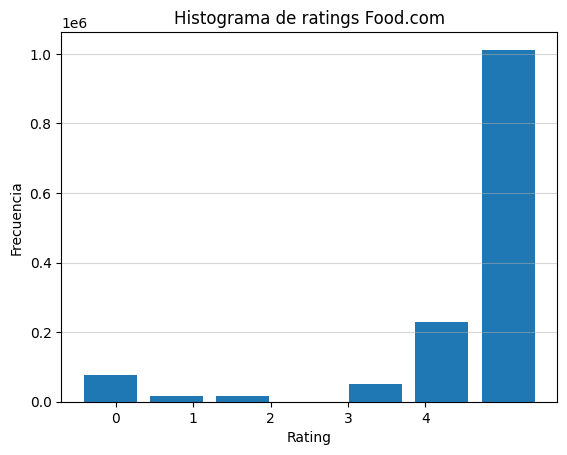

In [ ]:
# Función para graficar ratings
def plot_ratings_hist(df: pd.DataFrame, title: str, dataset: str = None):
  plt.hist(df['Rating'], bins=7, range=(-0.5, 5.5), rwidth=0.8, align='mid')
  plt.title(title)
  plt.xticks(np.arange(0, 5, 1))
  plt.xlabel("Rating")
  plt.ylabel("Frecuencia")
  plt.grid(axis='y', alpha=0.5)
  if dataset:
    save_dir = os.path.join("output", dataset)
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(os.path.join(save_dir, "ratings_hist.png"), dpi=300, bbox_inches='tight')
  plt.show()

# Graficamos ratings
plot_ratings_hist(df_foodcom_reviews, "Histograma de ratings Food.com", "foodcom")

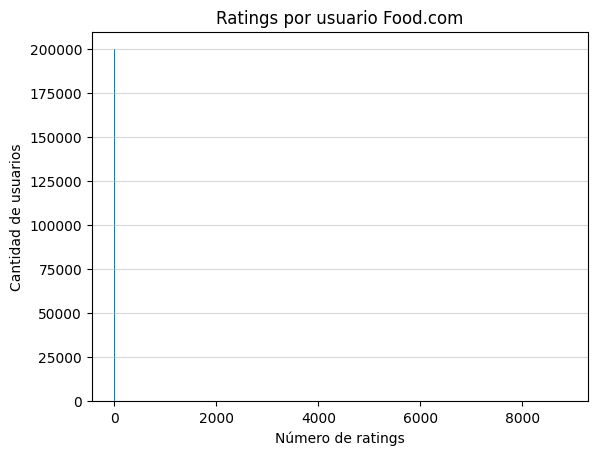

In [ ]:
# Función para graficar ratings por usuario
def plot_ratings_per_user(df: pd.DataFrame, title: str, dataset: str = None):
  # Obtenemos el número de ratings por usuario
  maxfreq = df.groupby("AuthorId")["Rating"].size().max()
  frequencies = np.zeros(maxfreq + 1)
  for user in df["AuthorId"].unique():
    # Obtenemos todos los ratings del usuario
    user_ratings = df[df["AuthorId"] == user]["Rating"]
    # Contamos el número de ratings
    count = user_ratings.count()
    frequencies[count] += 1
  maxfreq = 0
  for i, count in enumerate(frequencies):
    if count > 0:
      maxfreq = i
  frequencies = frequencies[:maxfreq + 1]
  # Graficamos
  plt.bar(np.arange(maxfreq + 1), frequencies)
  plt.title(title)
  plt.xlabel("Número de ratings")
  plt.ylabel("Cantidad de usuarios")
  plt.grid(axis='y', alpha=0.5)
  if dataset:
    save_dir = os.path.join("output", dataset)
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(os.path.join(save_dir, "ratings_per_user.png"), dpi=300, bbox_inches='tight')
  plt.show()

# Graficamos ratings por usuario
plot_ratings_per_user(df_foodcom_reviews, "Ratings por usuario Food.com", "foodcom")

In [ ]:
# Estadísticas de ratings por usuario
df_foodcom_reviews.groupby("AuthorId")["Rating"].size().describe()

count    271907.000000
mean          5.156109
std          53.468238
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        8842.000000
Name: Rating, dtype: float64

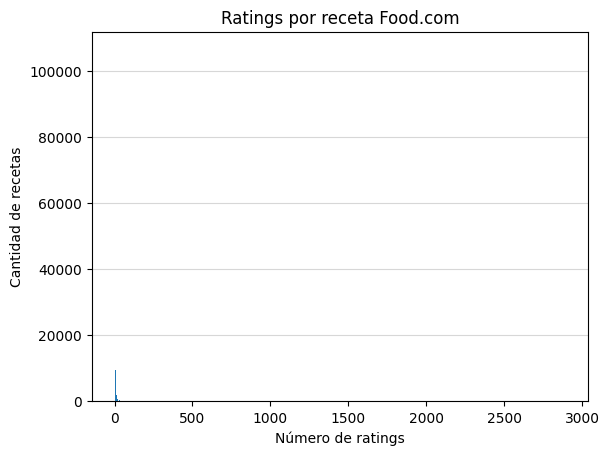

In [ ]:
# Función para graficar ratings por receta
def plot_ratings_per_recipe(df: pd.DataFrame, title: str, dataset: str = None):
  # Obtenemos el número de ratings por usuario
  maxfreq = df.groupby("RecipeId")["Rating"].size().max()
  frequencies = np.zeros(maxfreq + 1)
  for recipe in df["RecipeId"].unique():
    # Obtenemos todos los ratings del usuario
    recipe_ratings = df[df["RecipeId"] == recipe]["Rating"]
    # Contamos el número de ratings
    count = recipe_ratings.count()
    frequencies[count] += 1
  maxfreq = 0
  for i, count in enumerate(frequencies):
    if count > 0:
      maxfreq = i
  frequencies = frequencies[:maxfreq + 1]
  # Graficamos
  plt.bar(np.arange(maxfreq + 1), frequencies)
  plt.title(title)
  plt.xlabel("Número de ratings")
  plt.ylabel("Cantidad de recetas")
  plt.grid(axis='y', alpha=0.5)
  if dataset:
    save_dir = os.path.join("output", dataset)
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(os.path.join(save_dir, "ratings_per_recipe.png"), dpi=300, bbox_inches='tight')
  plt.show()

# Graficamos ratings por receta
plot_ratings_per_recipe(df_foodcom_reviews, "Ratings por receta Food.com", "foodcom")

In [ ]:
# Estadísticas de ratings por receta
df_foodcom_reviews.groupby("RecipeId")["Rating"].size().describe()

count    271678.000000
mean          5.160455
std          19.708589
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        2892.000000
Name: Rating, dtype: float64

# Análisis: MealRecPlus

In [42]:
PATH_MEALRECPLUS_META_DATA = "/content/datasets/mealrecplus/MealRecPlus-main/MealRec+/MealRec+H/meta_data/"
PATH_MEALRECPLUS_HEALTHINESS = "/content/datasets/mealrecplus/MealRecPlus-main/MealRec+/MealRec+H/healthiness/"

In [57]:
import zipfile
import os

zip_path_course = PATH_MEALRECPLUS_META_DATA+"course.zip"
zip_path_user_course = PATH_MEALRECPLUS_META_DATA+"user_course.zip"
extract_path_course = PATH_MEALRECPLUS_META_DATA

os.makedirs(extract_path_course, exist_ok=True)

with zipfile.ZipFile(zip_path_course, 'r') as zip_ref:
    zip_ref.extractall(extract_path_course)

with zipfile.ZipFile(zip_path_user_course, 'r') as zip_ref:
    zip_ref.extractall(extract_path_course)

print("✅ Archivos descomprimidos en:", extract_path_course)


✅ Archivo descomprimido en: /content/datasets/mealrecplus/MealRecPlus-main/MealRec+/MealRec+H/meta_data/


## Meta Data

In [22]:
# Cargar interacciones usuario-plato (ratings)
df_user_course = pd.read_csv(
    PATH_MEALRECPLUS_META_DATA+"user_course.csv",
    names=["user_id", "course_id", "rating", "dateLastModified"],
    header=None
)

# Convertir la columna 'rating' a tipo numérico, forzando los errores a NaN
df_user_course['rating'] = pd.to_numeric(df_user_course['rating'], errors='coerce')
df_user_course.dropna(subset=['rating'], inplace=True)

# Cargar metadatos de platos
df_course = pd.read_csv(PATH_MEALRECPLUS_META_DATA+"course.csv")

# Cargar los índices de usuarios y cursos
df_user2index = pd.read_csv(PATH_MEALRECPLUS_META_DATA+"user2index.txt", sep="\t", names=["user_id", "user_index"])
df_course2index = pd.read_csv(PATH_MEALRECPLUS_META_DATA+"course2index.txt", sep="\t", names=["course_id", "course_index"])

<ipython-input-22-9f6ffe910795>:2: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_user_course = pd.read_csv(


In [49]:
df_user_course_info = df_user_course.merge(df_course, on="course_id", how="left")

In [25]:
def get_rating_stats(df: pd.DataFrame) -> pd.DataFrame:
    stats = {
        "Número de usuarios": df["user_id"].nunique(),
        "Número de recetas": df["course_id"].nunique(),
        "Número de ratings": df.shape[0],
        "Rating promedio": round(df["rating"].mean(), 3),
        "Desviación estándar de ratings": round(df["rating"].std(), 3),
        "Rating mínimo": df["rating"].min(),
        "Rating máximo": df["rating"].max(),
        "Promedio de ratings por usuario": round(df.groupby("user_id")["rating"].size().mean(), 3),
        "Promedio de ratings por receta": round(df.groupby("course_id")["rating"].size().mean(), 3),
        "Densidad de ratings (%)": round(100 * df.shape[0] / (df["user_id"].nunique() * df["course_id"].nunique()), 3),
    }
    return pd.DataFrame(stats.items(), columns=["Estadística", "Valor"])


In [26]:
review_stats = get_rating_stats(df_user_course)
print(review_stats)


                       Estadística       Valor
0               Número de usuarios    1576.000
1                Número de recetas   11253.000
2                Número de ratings  151148.000
3                  Rating promedio       4.669
4   Desviación estándar de ratings       0.470
5                    Rating mínimo       4.000
6                    Rating máximo       5.000
7  Promedio de ratings por usuario      95.906
8   Promedio de ratings por receta      13.432
9          Densidad de ratings (%)       0.852


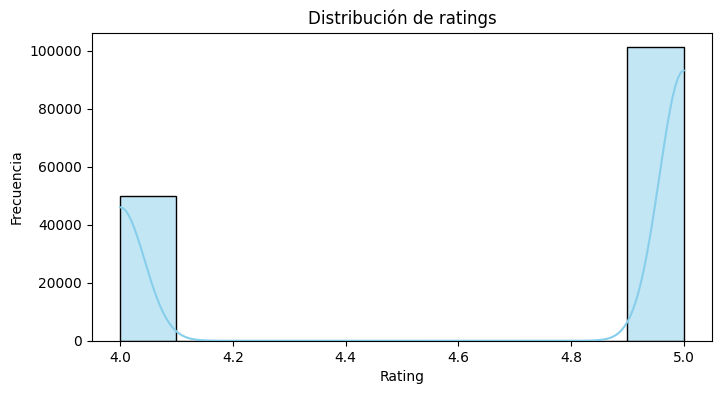

In [30]:
plt.figure(figsize=(8, 4))
sns.histplot(df_user_course["rating"], bins=10, kde=True, color="skyblue")
plt.title("Distribución de ratings")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()


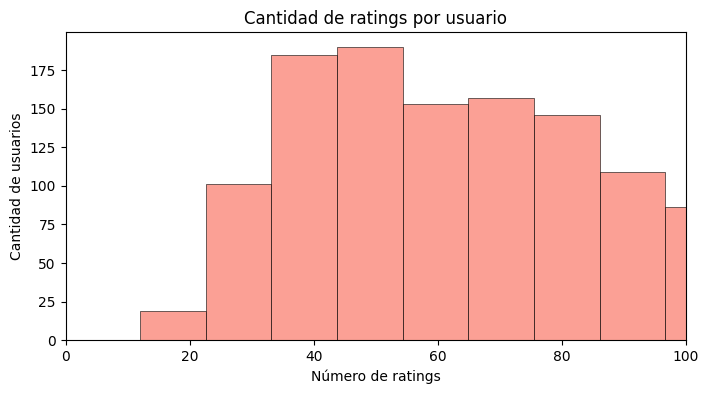

In [31]:
user_rating_counts = df_user_course.groupby("user_id").size()

plt.figure(figsize=(8, 4))
sns.histplot(user_rating_counts, bins=100, color="salmon")
plt.title("Cantidad de ratings por usuario")
plt.xlabel("Número de ratings")
plt.ylabel("Cantidad de usuarios")
plt.xlim(0, 100)
plt.show()


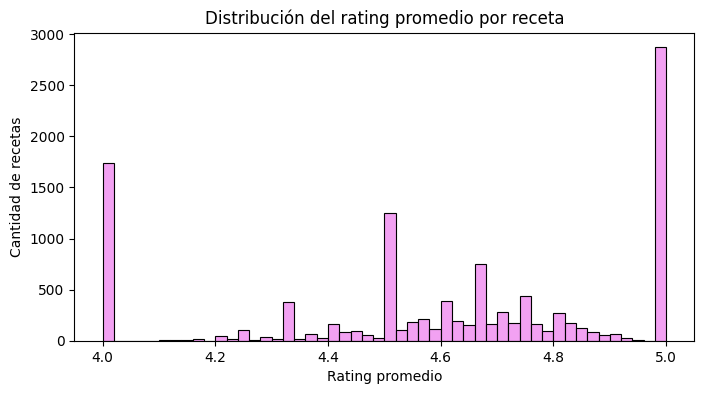

In [33]:
avg_rating_by_recipe = df_user_course.groupby("course_id")["rating"].mean()

plt.figure(figsize=(8, 4))
sns.histplot(avg_rating_by_recipe, bins=50, color="violet")
plt.title("Distribución del rating promedio por receta")
plt.xlabel("Rating promedio")
plt.ylabel("Cantidad de recetas")
plt.show()


In [40]:
df_course = df_course.dropna(subset=["ingredients"])

ingredient_lists = df_course["ingredients"].str.lower().str.split("^")

all_ingredients = [ingredient.strip() for sublist in ingredient_lists for ingredient in sublist]
ingredient_counts = Counter(all_ingredients)

df_ingredients = pd.DataFrame(ingredient_counts.items(), columns=["ingredient", "count"])
df_ingredients = df_ingredients.sort_values(by="count", ascending=False)

<ipython-input-41-e0b05d08eafe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ingredients, x="count", y="ingredient", palette="viridis")


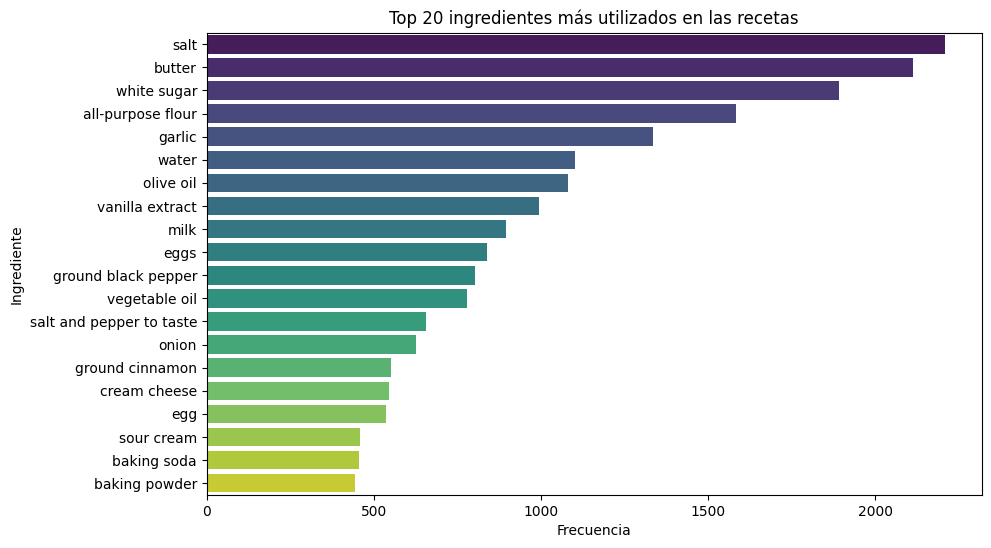

In [41]:
top_ingredients = df_ingredients.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_ingredients, x="count", y="ingredient", palette="viridis")
plt.title("Top 20 ingredientes más utilizados en las recetas")
plt.xlabel("Frecuencia")
plt.ylabel("Ingrediente")
plt.show()


## Healthiness data

In [43]:
course_fsa = pd.read_csv(PATH_MEALRECPLUS_HEALTHINESS+"course_fsa.txt", header=None, names=["fsa_score"])
course_who = pd.read_csv(PATH_MEALRECPLUS_HEALTHINESS+"course_who.txt", header=None, names=["who_score"])

# Puntajes por comida (meal)
meal_fsa = pd.read_csv(PATH_MEALRECPLUS_HEALTHINESS+"meal_fsa.txt", header=None, names=["fsa_score"])
meal_who = pd.read_csv(PATH_MEALRECPLUS_HEALTHINESS+"meal_who.txt", header=None, names=["who_score"])

# Puntajes promedio por usuario según sus comidas
user_fsa = pd.read_csv(PATH_MEALRECPLUS_HEALTHINESS+"user_fsa.txt", header=None, names=["fsa_score"])
user_who = pd.read_csv(PATH_MEALRECPLUS_HEALTHINESS+"user_who.txt", header=None, names=["who_score"])

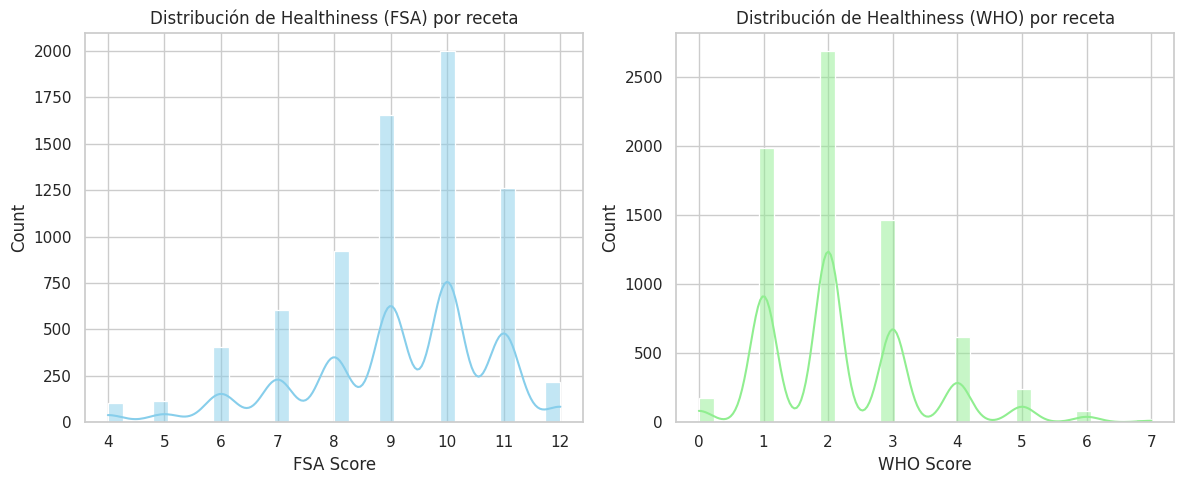

In [45]:
sns.set(style="whitegrid")

# Distribuciones de puntajes por receta
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(course_fsa["fsa_score"], bins=30, kde=True, color="skyblue")
plt.title("Distribución de Healthiness (FSA) por receta")
plt.xlabel("FSA Score")

plt.subplot(1, 2, 2)
sns.histplot(course_who["who_score"], bins=30, kde=True, color="lightgreen")
plt.title("Distribución de Healthiness (WHO) por receta")
plt.xlabel("WHO Score")

plt.tight_layout()
plt.show()


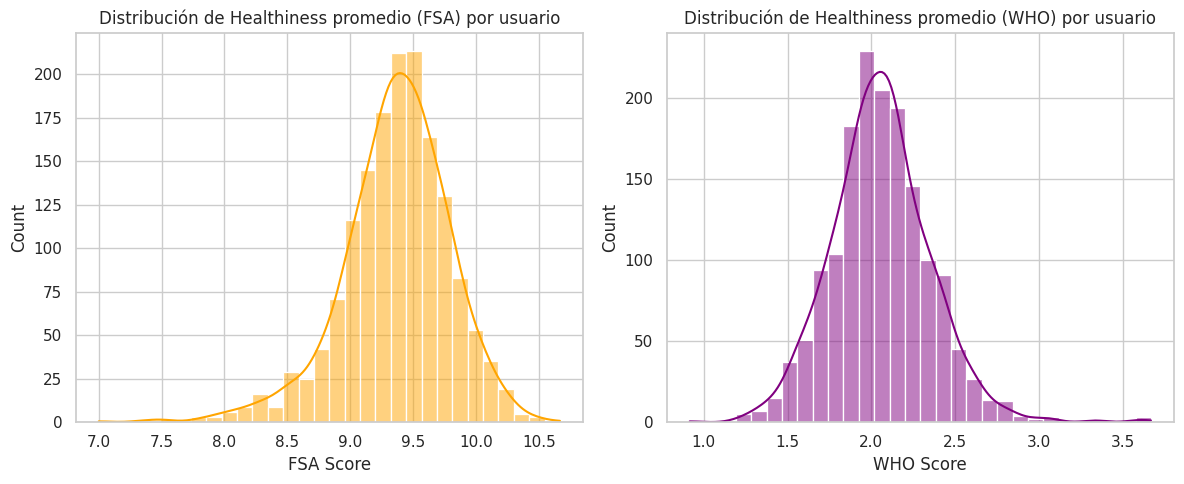

In [46]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(user_fsa["fsa_score"], bins=30, kde=True, color="orange")
plt.title("Distribución de Healthiness promedio (FSA) por usuario")
plt.xlabel("FSA Score")

plt.subplot(1, 2, 2)
sns.histplot(user_who["who_score"], bins=30, kde=True, color="purple")
plt.title("Distribución de Healthiness promedio (WHO) por usuario")
plt.xlabel("WHO Score")

plt.tight_layout()
plt.show()


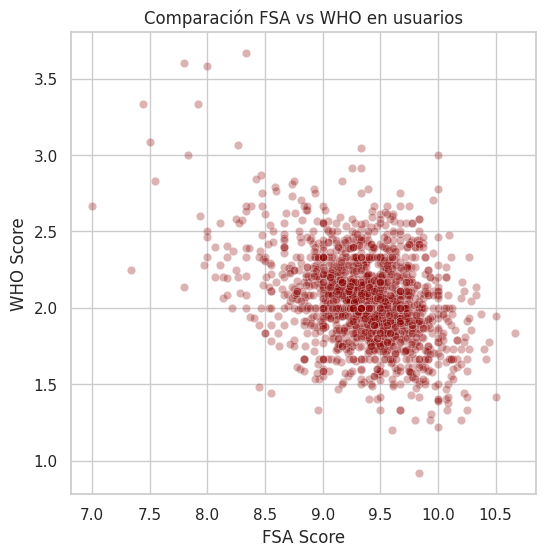

📈 Correlación FSA-WHO en usuarios: -0.378


In [48]:
merged_user = pd.concat([user_fsa, user_who], axis=1)

plt.figure(figsize=(6, 6))
sns.scatterplot(data=merged_user, x="fsa_score", y="who_score", alpha=0.3, color="darkred")
plt.title("Comparación FSA vs WHO en usuarios")
plt.xlabel("FSA Score")
plt.ylabel("WHO Score")
plt.show()

correlation_users = merged_user.corr().iloc[0,1]
print(f"📈 Correlación FSA-WHO en usuarios: {correlation_users:.3f}")


# Análisis: Nutrigreen

In [51]:
df_nutri = pd.read_csv("/content/datasets/nutrigreen/data.csv")

# Mostrar las primeras filas
df_nutri.head()

,File Name,Class ID,X,Y,Width,Height
0,nutriScoreD (657).txt,3,0.365901,0.847100,0.135998,0.223199
1,nutriScoreE (535).txt,4,0.149490,0.899385,0.246464,0.125659
2,3256226080853.txt,5,0.636986,0.850000,0.107632,0.050000
3,nutriScoreD (207).txt,3,0.311250,0.733940,0.111667,0.150964
4,nutriScoreB (98).txt,1,0.853403,0.830666,0.191099,0.067397


In [52]:
# Diccionario de clases
class_map = {
    0: "NutriScore A",
    1: "NutriScore B",
    2: "NutriScore C",
    3: "NutriScore D",
    4: "NutriScore E",
    5: "BIO",
    6: "V-Label"
}

# Agregar una columna con los nombres
df_nutri["class_name"] = df_nutri["Class ID"].map(class_map)


In [53]:
print("📊 Número total de imágenes:", df_nutri["File Name"].nunique())
print("📊 Clases disponibles:")
print(df_nutri["class_name"].value_counts())


📊 Número total de imágenes: 7271
📊 Clases disponibles:
class_name
BIO             2394
NutriScore A    1274
NutriScore B    1114
NutriScore D    1007
NutriScore E     973
V-Label          875
NutriScore C     872
Name: count, dtype: int64


<ipython-input-54-9aba992db7d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_nutri, y="class_name", order=df_nutri["class_name"].value_counts().index, palette="Set2")


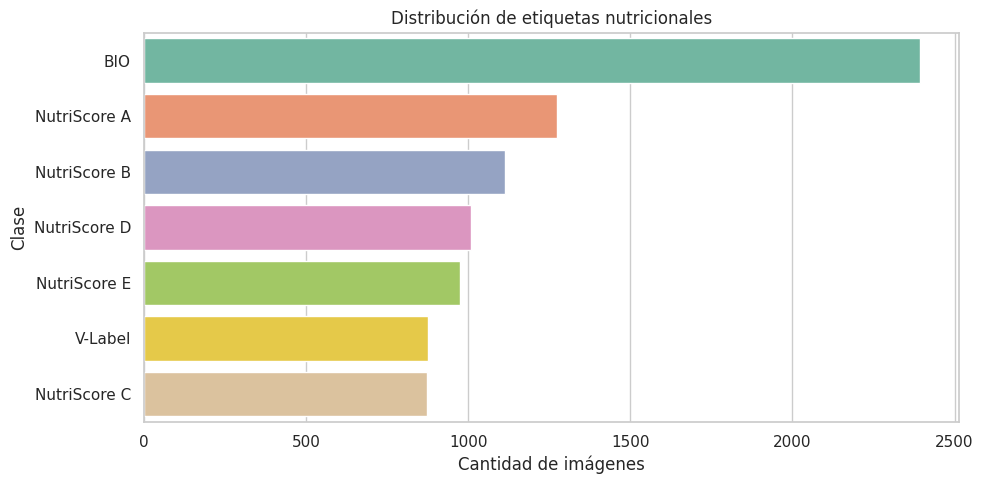

In [54]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_nutri, y="class_name", order=df_nutri["class_name"].value_counts().index, palette="Set2")
plt.title("Distribución de etiquetas nutricionales")
plt.xlabel("Cantidad de imágenes")
plt.ylabel("Clase")
plt.tight_layout()
plt.show()
